# Collaborative Filtering Book Recommendation System

Dataset url http://www2.informatik.uni-freiburg.de/~cziegler/BX/

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Get the Data

In [2]:
books = pd.read_csv('BX-Books.csv', sep=';', error_bad_lines=False, encoding='latin-1')
books.head()

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\Users\prash\Anaconda3\lib\site-packages\IPython\core\interactiveshell.p

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


Renaming `books` columns

In [3]:
# ISBN - The International Standard Book Number
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

In [4]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
users = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding='latin-1')
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


renaming `users` columns

In [6]:
users.columns = ['userId', 'location', 'age']
users.head()

,userId,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [7]:
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding='latin-1')
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


Renaming `ratings` columns

In [8]:
ratings.columns = ['userId', 'ISBN', 'bookRating']
ratings.head()

,userId,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [9]:
books.shape

(271360, 8)

In [10]:
users.shape

(278858, 3)

In [11]:
ratings.shape

(1149780, 3)

### Exploratory Data Analysis (EDA) 

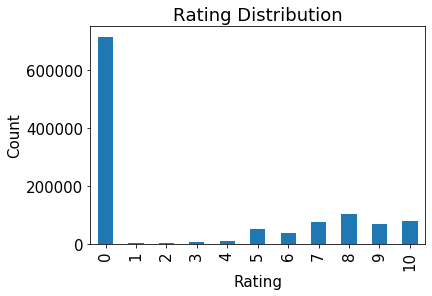

In [12]:
plt.rc('font', size=15)
ratings.bookRating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [13]:
print(books.shape)
print(list(books.columns))

(271360, 8)
['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']


In [14]:
print(users.shape)
print(list(users.columns))

(278858, 3)
['userId', 'location', 'age']


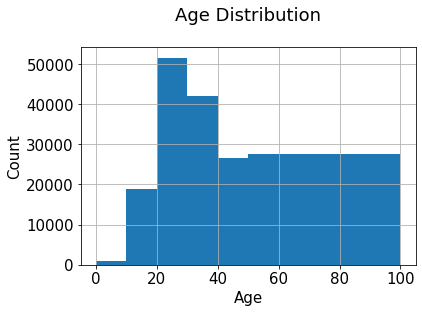

In [15]:
users.age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

As you can see from the above gap more than 50,000 votes have given by the people whos age is in between 20-30 years old.

In [16]:
users.groupby('location')['userId'].count().sort_values(ascending=False)[:10]

location
london, england, united kingdom        2506
toronto, ontario, canada               2250
sydney, new south wales, australia     1744
melbourne, victoria, australia         1708
portland, oregon, usa                  1629
chicago, illinois, usa                 1526
seattle, washington, usa               1484
new york, new york, usa                1411
madrid, madrid, spain                  1400
vancouver, british columbia, canada    1359
Name: userId, dtype: int64

### Recommendation Based on Rating Counts

In [17]:
ratings.groupby('ISBN')['bookRating'].count()[:10]

ISBN
 0330299891    2
 0375404120    2
 0586045007    1
 9022906116    2
 9032803328    1
 9044922564    1
 9044922572    1
 9044922718    1
 9044923161    1
 904492401X    1
Name: bookRating, dtype: int64

In [18]:
rating_count = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].count())
rating_count.sort_values('bookRating', ascending=False).head()

,bookRating
ISBN,
0971880107,2502
0316666343,1295
0385504209,883
0060928336,732
0312195516,723


The book with `ISBN` 0971880107 has received the most rating counts. Let's find out what book it is, and what books are in top 5.

In [19]:
most_rated_books = pd.DataFrame(['0971880107', '0316666343', '0385504209', '0060928336', '0312195516'], index=np.arange(5), columns=['ISBN'])
most_rated_books_summary = pd.merge(most_rated_books, books, on='ISBN')

In [20]:
most_rated_books_summary.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
1,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
2,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
3,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...
4,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...


In [21]:
ratings.groupby('userId')['userId'].count().sort_values().head()

userId
2         1
159665    1
159662    1
159655    1
159651    1
Name: userId, dtype: int64

In [22]:
ratings.groupby('ISBN')['bookRating'].count().sort_values().head()

ISBN
0688009328    1
0817221999    1
0817224181    1
0817230254    1
0817230300    1
Name: bookRating, dtype: int64

**Selecting users which have given ratings to more than 100 books**

In [23]:
counts1 = ratings['userId'].value_counts()
ratings = ratings[ratings['userId'].isin(counts1[counts1 >= 100].index)]

**Selecting books which has rating count more than 100**

In [24]:
counts = ratings['bookRating'].value_counts()
ratings = ratings[ratings['bookRating'].isin(counts[counts >= 100].index)]

### Collaborative Filtering Using K-Nearest Neighbors (KNN)

KNN is a machine learning algorithm to find out clusters of similar users based on common book ratings, and make predictions using the average rating of top-k nearest neighbors.

For example, we first present ratings in a matrix having one row for each item (book) and one column for each user

In [25]:
ratings.groupby('userId')['userId'].count().sort_values().head()

userId
160410    100
115692    100
175559    100
160409    100
65663     100
Name: userId, dtype: int64

In [26]:
ratings.groupby('ISBN')['bookRating'].count().sort_values().head()

ISBN
 0330299891    1
0771087691     1
0771087705     1
0771087985     1
0771088035     1
Name: bookRating, dtype: int64

In [27]:
ratings.head()

,userId,ISBN,bookRating
412,276925,0006511929,0
413,276925,002542730X,10
414,276925,0060520507,0
415,276925,0060930934,0
416,276925,0060951303,0


In [28]:
ratings.shape

(658805, 3)

In [29]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [30]:
books.shape

(271360, 8)

In [31]:
combine_book_rating = pd.merge(ratings, books, on='ISBN')
combine_book_rating.head()

,userId,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
2,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
3,10030,002542730X,7,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
4,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...


In [32]:
combine_book_rating.shape

(606344, 10)

Dropping unnecessary columns

In [33]:
columns = ['yearOfPublication', 'publisher', 'bookAuthor', 'imageUrlS', 'imageUrlM', 'imageUrlL']
combine_book_rating = combine_book_rating.drop(columns, axis=1)
combine_book_rating.head()

,userId,ISBN,bookRating,bookTitle
0,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
1,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
2,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...
3,10030,002542730X,7,Politically Correct Bedtime Stories: Modern Ta...
4,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...


we then group by book titles and create a new column for total rating count

In [34]:
# dropping NaN values
combine_book_rating = combine_book_rating.dropna(axis=0, subset=['bookTitle'])

In [35]:
combine_book_rating.groupby('bookTitle')['bookRating'].count().sort_values().head()

bookTitle
Monsieur Etonnant (Bonhomme)                  1
Kitchen (Historic Communities (Paperback))    1
The Diaries of Kenneth Tynan                  1
Kit's Wilderness                              1
The Diaries of Lady Anne Clifford             1
Name: bookRating, dtype: int64

In [36]:
book_ratingCount = (combine_book_rating.groupby('bookTitle')['bookRating']
                            .count()
                            .reset_index()
                            .rename(columns={'bookRating':'totalRatingCount'})
                            [['bookTitle', 'totalRatingCount']]
                   )
book_ratingCount.head()

,bookTitle,totalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,3
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


we combine the rating data with the total rating count data, this gives us exactly what we need to find out, which books are popular and filter out lesser-known books.

In [37]:
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, on='bookTitle')
rating_with_totalRatingCount.head()

,userId,ISBN,bookRating,bookTitle,totalRatingCount
0,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,105
1,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,105
2,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,105
3,10030,002542730X,7,Politically Correct Bedtime Stories: Modern Ta...,105
4,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,105


selecting books which has rating count greater than 50

In [38]:
popularity_threshhold = 50
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshhold')
rating_popular_book.head()

,userId,ISBN,bookRating,bookTitle,totalRatingCount
0,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,105
1,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,105
2,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,105
3,10030,002542730X,7,Politically Correct Bedtime Stories: Modern Ta...,105
4,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,105


In [39]:
rating_popular_book.shape

(100811, 5)

### Implementing KNN

We convert our table to a 2D matrix, and fill the missing values with zeros (since we will calculate distance between rating vectors). We then transform the values (ratings) of the matrix datafrmae into scipy sparse matrix for more effecient calculations.


Finding the Nearest Neighbors we use unsupervised algorithm with `sklearn.neighbors.` The algorithm we use to compute the nearest neighbors is `brute`, and we specify the `metric=cosine` so that the algorithm will calculate the cosine similarity between rating vectors. Finally, we fit the model. 

In [40]:
from scipy.sparse import csc_matrix

# Dropping duplicates
rating_popular_book = rating_popular_book.drop_duplicates(['userId', 'bookTitle'])

# Creating pivot table
rating_popular_book_pivot = rating_popular_book.pivot(index='bookTitle', columns='userId', values='bookRating').fillna(0)

In [41]:
rating_popular_book_pivot.head()

userId,183,254,507,882,1424,1435,1733,1903,2033,2110,...,276018,276463,276680,276925,277427,277478,277639,278137,278188,278418
bookTitle,,,,,,,,,,,,,,,,,,,,,
1984,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204 Rosewood Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24 Hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0


In [42]:
rating_popular_book_pivot.shape

(1098, 1805)

creating sparse matrix for effeiceint calculation

In [43]:
rating_popular_book_matrix = csc_matrix(rating_popular_book_pivot.values)
rating_popular_book_matrix[0]

<1x1805 sparse matrix of type '<class 'numpy.float64'>'
	with 41 stored elements in Compressed Sparse Column format>

In [44]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(rating_popular_book_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

Selecting a random book index

In [45]:
query_index = np.random.choice(rating_popular_book_pivot.shape[0])
print(query_index)

775


In [46]:
distances, indices = model_knn.kneighbors(rating_popular_book_pivot.iloc[query_index,:].values.reshape(1,-1), n_neighbors=6)

In [47]:
# rating_popular_book_pivot.index[query_index]
rating_popular_book_pivot.index[query_index]

'The Cereal Murders'

In [48]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(rating_popular_book_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, rating_popular_book_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for The Cereal Murders:

1: The Grilling Season, with distance of 0.5376374557910785:
2: Sudden Prey, with distance of 0.7437103655398398:
3: Prime Cut, with distance of 0.7475717954665059:
4: Lily White, with distance of 0.7524082945584705:
5: No One to Trust, with distance of 0.768777741812479:
